In [3]:
!pip install yfinance
!pip install pandas-ta

  Using cached pandas_ta-0.3.14b0-py3-none-any.whl


In [4]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta as delta
import numpy as np
import os
import seaborn as sb

In [23]:
symbol='ESSENTIA.NS'
df=yf.download(symbol, start='2001-01-01', end='2024-01-01')
df.describe()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2.554000e+03
mean,0.825264,0.835013,0.810535,0.821661,0.821661,7.974192e+05
std,1.068190,1.089149,1.034574,1.058870,1.058870,5.320314e+06
min,0.024333,0.024333,0.024333,0.024333,0.024333,0.000000e+00
25%,0.291996,0.300107,0.291996,0.291996,0.291996,0.000000e+00
50%,0.413661,0.413661,0.405550,0.409606,0.409606,2.400000e+01
75%,0.713768,0.713768,0.713768,0.713768,0.713768,1.232800e+04
max,4.725000,4.725000,4.525000,4.525000,4.525000,1.039279e+08


In [24]:
df['20SMA']=df['Close'].rolling(window=20).mean()
df['50SMA']=df['Close'].rolling(window=50).mean()
df['100SMA']=df['Close'].rolling(window=100).mean()
df['200SMA']=df['Close'].rolling(window=200).mean()

In [25]:
qty_holding=0
total_cost=0
pnl=[]

for i in range(21, len(df)-1):
    if df['Close'][i]>df['Open'][i-1] and df['Close'][i]>df['100SMA'][i]:
        price_buy=df['Open'][i+1]
        qty_holding+=1
        total_cost=price_buy*1
    elif df['Open'][i]> df['Close'][i]:
        price_sell=df['Open'][i+1]
        if qty_holding>0:
            pnl.append((price_sell-total_cost/qty_holding)*qty_holding)
            qty_holding=0
            total_cost=0

In [26]:
pnl_df=pd.DataFrame(pnl,columns=['P&L'])
pnl_df['Mean_returns']=pnl_df['P&L'].cumsum()

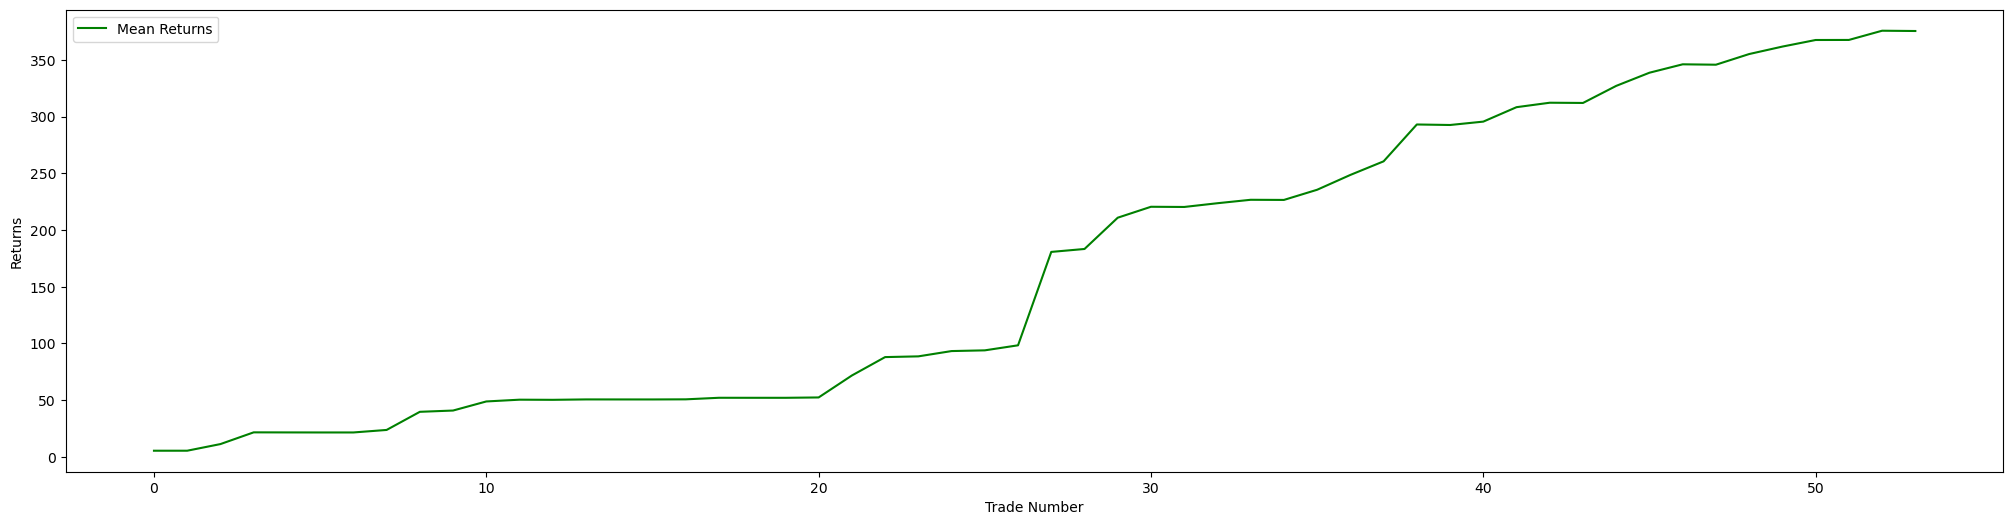

In [27]:
plt.figure(figsize=(25,6))
plt.plot(pnl_df['Mean_returns'],label="Mean Returns", color='green')
plt.xlabel('Trade Number')
plt.ylabel('Returns')
plt.legend()
plt.show()